In [181]:
import numpy as np

import matplotlib.pyplot as plt

import scipy
from scipy import stats

In [ ]:
%load_ext cython

# Basic expansion in base b

this code works for integers

In [209]:
def int2base(x, b=2):  
    digits = []
    while x > 0:
        digits.append(x % b)
        x //= b
    return list(reversed(digits))
    #or return digits[::-1]


for $0 < p/q < 1$ things are done in a different order

In [210]:
def digits(p,q,
           b=2, 
           num_digits=20):
    
    if (p > q): raise ValueError
    r = p
    digits = [0]
    for _ in range(num_digits):
        digits.append( (r*b) // q)
        r = (r*b) % q
    return digits

In [211]:
digits(1,10)

[0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]

---
## evaluate the expansion to check

In [212]:
def naif_eval(x,A):
    return sum([a*x**k for k,a in enumerate(A)])

In [213]:
dd = digits(2,3,num_digits=60)
dd[:5]

[0, 1, 0, 1, 0]

In [130]:
naif_eval(.5,dd[:])

0.6666666666666666

---

# Studying the error

In [177]:
p,q = 1,3
b = 2
dd = digits(p,q,num_digits=50,b=b)
error = [p/q- naif_eval(1/b, dd[:k]) for k in range(1,len(dd)) ]

- The error decreases exponentially fast 
- We can calculate the slope using a linear regression

## Rough calculation of the error
- $\max(a_k) \leq b-1$
- $ 0 < \sum^n a_k b^{-k} < p/q $ 

$ \text{error} = p/q - \sum^n a_k b^{-k}  
= \sum_{n+1}^ \infty a_k b^{-k} 
< \max(a_k) \times b^{-(n+1)} \sum_ 0 b^{-k}
<  b^{-(n+1)} $ 


Text(0.5, 0, 'number of digits')

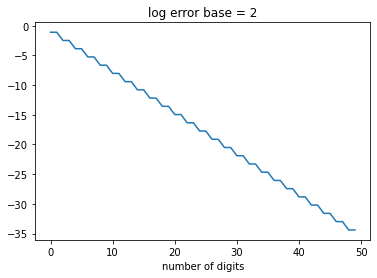

In [219]:
errors = [ x for x in error if x>0]
plt.plot(np.log(errors));
plt.title(f"log error base = {b}")
plt.xlabel("number of digits")

In [144]:
import scipy
from scipy import stats

In [179]:
rl = scipy.stats.linregress(np.arange(len(errors)), np.log(errors) )
rl.slope, np.exp(rl.slope)

(-0.6924090447032196, 0.5003692041730189)

# conclusion

On average the error goes down by $1/b$ for each new digit we add.

---

## More sophistocated

This returns the **full** expansion in base ```b``` in 2 parts
1. an initial sequence of digits  which isn't repeated
1. the repeating part

---

### Examples

1/6 = 0.166666666

- starts with 1
- the repeating part is 6

$\frac16 = \frac{1}{10}  +  \frac{1}{10} \times \frac{6}{9}$ 

and form the binary expansion of $1/10$

- starts with 0
- the repeating part is 0011

$\frac{1}{10}   =  \frac{1}{2} \times  \left( 3  \times  \frac{1/16}{1- 1/16} \right)$ 

In [198]:
def digits(p,q,
           b=2,n=20):
    r = p
    # this is my "memory"
    pos = {p : 0}
    digits = []
    
    while True:
        p, r = (r*b) // q, (r*b) % q
        digits.append(p)
        # this is a trick
        # stop when I've already seen the value of r
        if r in pos: break
        pos[r] = len(digits)
    
    return digits[:pos[r]], digits[pos[r]:]

In [202]:
digits(1,70,b=10)

([0], [1, 4, 2, 8, 5, 7])

In [203]:
1/70

0.014285714285714285

---
# Exo 3

---
## Factorials etc.

Python [no longer has a limit on the biggest integer](https://linuxhint.com/python-max-integer/)
so this is no longer pertinent

- But we can force it to use different precisions using ```numpy```
- See below for details



---
## 0.3 - (0.1 + 0.1 + 0.1)

you should get something like

``` -5.551115123125783e-17 ```

- $10^{3}$ is roughly $2^{10}$
- so $10^{-18}$ is roughly $2^{-60}$
- and it looks like the machine is 64-bit


Here is how to force python to use different precisions
to check my reasoning

In [294]:
x = np.array([0.3,0.1]).astype(np.float64)
x

array([0.3, 0.1])

In [295]:
x[0] - (3*x[1])

-5.551115123125783e-17

In [296]:
x = np.array([0.3,0.1]).astype(np.float32)
x

array([0.3, 0.1], dtype=float32)

In [297]:
x[0] - (3*x[1])

7.450580596923828e-09

---

In [289]:
from math import factorial

In [290]:
factorial(1000)

4023872600770937735437024339230039857193748642107146325437999104299385123986290205920442084869694048004799886101971960586316668729948085589013238296699445909974245040870737599188236277271887325197795059509952761208749754624970436014182780946464962910563938874378864873371191810458257836478499770124766328898359557354325131853239584630755574091142624174743493475534286465766116677973966688202912073791438537195882498081268678383745597317461360853795345242215865932019280908782973084313928444032812315586110369768013573042161687476096758713483120254785893207671691324484262361314125087802080002616831510273418279777047846358681701643650241536913982812648102130927612448963599287051149649754199093422215668325720808213331861168115536158365469840467089756029009505376164758477284218896796462449451607653534081989013854424879849599533191017233555566021394503997362807501378376153071277619268490343526252000158885351473316117021039681759215109077880193931781141945452572238655414610628921879602238389714760

---

now let's force 64 bit integers

In [301]:
x = np.array([1000]).astype(np.int64)

In [304]:
def factorial(n):
    if n == 1: return 1
    return n*factorial(n-1)

In [305]:
factorial(x[0])

/tmp/ipykernel_3567/1018044469.py:3: RuntimeWarning: overflow encountered in long_scalars
  return n*factorial(n-1)


0

---
## Euler's constant

You should read the [wikipedia page](https://en.wikipedia.org/wiki/Euler%27s_constant)

I'll use **numpy** to do this without writing a ```for``` loop

In [5]:
np.arange(1,101)

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

---

The ```for``` loop is to study the convergence over bigger and bigger ranges

Convergence is very very slow

-  because $1/n - (\log(n+1) -\log(n)) \rightarrow 0$ very slowly $O(1/n^2)$
- $2^{-n} \rightarrow 0$ much more quickly

In [6]:
[sum(1./np.arange(1,k)) - np.log(k) for k in range(1000,10000,1000)]

[0.5767155815682061,
 0.576965644068201,
 0.577048988975589,
 0.5770906596931713,
 0.5771156615681665,
 0.5771323292533648,
 0.5771442346293849,
 0.5771531635994176,
 0.577160108317134]

[euler's constant](https://en.wikipedia.org/wiki/Euler%27s_constant)

0.5772156649

---

## This is purely for amusement

speed test

- a **pure** Python function 
- Python compiled to C using Cython
- a **one liner** in numpy


---

## Pure Python 

I saw someone write this and it's correct

In [7]:
def harmonic_py(n):
    s = 0 
    for i in range(1, n+1):
        s += 1.0/i
    return s

there's a trick to cross compile this to C 

- add typing
- this should be [easier](https://docs.python.org/3/library/typing.html) but :( apparently only for linters

In [58]:
%load_ext Cython

In [59]:
%%cython 

import cython

# I think this turns off a division by zero check 
@cython.cdivision(True)
def harmonic(int n):
    cdef int i 
    # careful you need to use double not float here
    cdef double s = 0
    for i in range(1, n+1):
        s += 1.0/i
    return s

if you don't use **double** then things are pretty bad
because of rounding errors

In [11]:
harmonic(5), (1./np.arange(1,6)).sum()

(2.283333333333333, 2.283333333333333)

In [390]:
harmonic(5), (1./np.arange(1,6)).sum()

(2.283333333333333, 2.283333333333333)

but **double** is just fine 

In [60]:
#fails at 10**10

k = 10**9
harmonic(k) - np.log(k) - 0.5772156649

5.021394411386382e-10

## Much slower

but in practice this is good for understanding cases

In [769]:
k = 100000
sum(1./np.arange(1,k)) - np.log(k)

0.5772106648931068

## Comparison

In [98]:
k = 100000

In [132]:
%%timeit

harmonic(k) - np.log(k)

128 µs ± 3.13 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
%%timeit
(1./np.arange(1,k)).sum() - np.log(k)

599 µs ± 19.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [18]:
%%timeit

harmonic_py(k) - np.log(k)

6.86 ms ± 304 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


---

In [34]:
A = np.random.randint(10,size=50)

def eval(A, x):
    s, u =  A[0], 1
    for a in A[1:]:
        u *= x
        s += u*a   
    return s
        

In [54]:
%%timeit

eval(A,2)

12.8 µs ± 89.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [53]:
%%timeit
naif_eval(2,A)

26.8 µs ± 1.43 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [55]:
def horner_py(x, P):
    val = 0
    for coeff in reversed(P):
        val = coeff + val*x
    return val

In [57]:
%%timeit
horner_py(2,A)

10.7 µs ± 289 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


---

# Exo 5

## Horner

- P a list of coefficients to of a polynomial to be evaluated in
- x a floating point

Note that ```P[0]``` is the constant term so we need to reverse the order in the list 
when applying Horner.

There are 2 arithemetic operations per loop
```
        val *= x
        val += coeff
```
and the loop is executed ```len(P)``` times 
so the algorithm is linear in the degree of ```P```.

---

I usually use something like this to evaluate - it's naive evaluation

``` sum ([x**i * coeff for i,coeff in enumerate(P)])```

- ```x**i * coeff``` is i multiplications
- there are ```len(P)``` - 1 additions in the ```sum()```

so this is quadratic in the degree of ```P```.

Technically this uses more memory than a ```for``` loop.


In [250]:
P = np.random.randint(5,size=50)
P

array([2, 4, 0, 1, 3, 2, 1, 3, 0, 3, 0, 1, 0, 3, 4, 3, 0, 1, 4, 2, 1, 1,
       4, 4, 4, 1, 2, 2, 3, 1, 4, 3, 0, 0, 0, 2, 1, 4, 4, 1, 4, 3, 1, 1,
       0, 1, 2, 0, 2, 2])

In [ ]:
def naif_eval(x,P):
    val = 0
    for i, coeff in enumerate(P):
        # i + 2 multiplications per loop
        val += coeff*x**i
    return val

# or  
def naif_eval:
    return sum ([x**i * coeff for i,coeff in enumerate(P)])
    

In [246]:
def eval(x, P):
    s, u = P[0], 1
    for coeff in P[1:]:
        # two multiplications per loop
        # total = 2*deg(P) 
        u *= x
        s += u*coeff  
    return s

In [248]:
eval(.5,P)

3.597715479463389

In [231]:
[1]*3 

[1, 1, 1]

In [232]:
def horner_py(x, P):
    val = 0
    for coeff in reversed(P):
        # one multiplication per loop
        # total = deg(P)  + 1
        val *= x
        val += coeff     
    return val

In [249]:
horner_py(.5, P)

3.597715479463389

---

speed comparison

---

Timing things doesn't really make good sense
as there are all sorts of things that can happen
during between different executions of the function.

In [242]:
P = np.random.randint(5,size=50)
P

array([1, 2, 4, 2, 3, 4, 0, 2, 2, 4, 2, 3, 0, 2, 3, 3, 0, 2, 1, 2, 4, 3,
       1, 0, 4, 0, 3, 4, 4, 4, 3, 1, 4, 4, 0, 3, 2, 1, 3, 1, 3, 3, 4, 0,
       1, 3, 1, 3, 1, 2])

In [243]:
%%timeit
naif_eval(.5,P)

81.4 µs ± 2.64 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [244]:
%%timeit
eval(.5,P)

73.8 µs ± 1.08 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [245]:
%%timeit
horner_py(.5,P)

10.5 µs ± 157 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


---

There are things that go wrong if we try to do this **naively**

In [252]:
import time

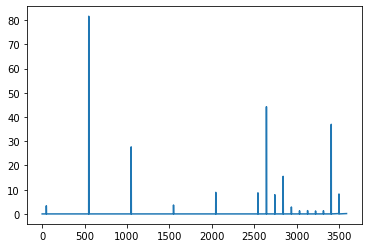

In [286]:
polys = [ P[:n] for n in range(0,len(P),10)]

for P in polys:
    for k in range(100):
        naif_eval(.5, P)
    T.append(time.time())

# this calculates differences between consecutive elements in T[]
#plt.plot(T);
plt.plot(np.diff(T,1));

In [851]:
horner_py(.9,P[:70])

9.993734212517824

In [263]:
len(P)

50

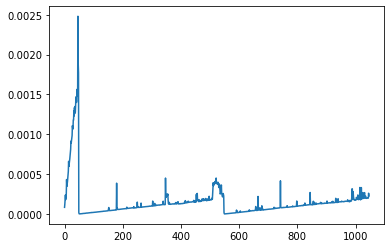

In [271]:
polys = [ P[:n] for n in range(0,len(P),2)]

for P in polys:
    horner_py(1.1, P)
    T.append(time.time())

ts = np.diff(T,1)
plt.plot(ts[ts<.1][:]);

In [898]:
horner_py(1.1,P), naif_eval(1.1,P)

(1.2134030984085583e+87, 1.2134030984085563e+87)

---

I do sometimes compile Python to C using [Cython](https://cython.org/)
and then comparing speeds between different implementations does make sense.

In [61]:
%load_ext cython

In [62]:
%%cython

import cython

def horner(double x, list P):
    cdef double val = 0
    for coeff in reversed(P):
        val *= x
        val += coeff
        
    return val

In [67]:
P = [1]*80
horner(.9,P), sum([.9**i * coeff for i, coeff in enumerate(P)])

(9.997815254994718, 9.997815254994714)

In [68]:
%%timeit 
horner(.9,P)

2.48 µs ± 82.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [69]:
%%timeit 
horner_py(.9,P)

3.98 µs ± 87.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [65]:
%%timeit 
np.array(P).dot(np.array([.9**i for i in range(len(P))]))

3.99 µs ± 168 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [88]:
%%timeit 
sum ([.9**i * coeff for i, coeff in enumerate(P)])

85.6 µs ± 4.9 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [92]:
def ev(x,P):
    s = 0 
    for i,c in enumerate(P):
        s += c*x**i
    return s

ev(.9,P), horner(.9,P)

(9.999999999999993, 9.999999999999995)

In [91]:
%%timeit 
ev(.9,P)

85 µs ± 2.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [180]:
%%cython 

import cython
@cython.boundscheck(False)
@cython.cdivision(True)
@cython.nonecheck(False)

def n2b(int x, int b=2):  
    cdef list digits = []
    
    while x > 0:
        digits.append(x % b)
        x //= b
    return list(reversed(digits))


In [124]:
%%cython

import cython
import numpy as np
cimport numpy as np

@cython.boundscheck(False)

def n2b(int x, int b=2):  
    cdef np.ndarray digits = np.zeros(20, dtype=int)
    
    cdef int i = 19
    while x > 0:
        digits[i] = x % b
        i -= 1
        x //= b
    return digits[i:]


In [129]:
%%timeit

n2b(167)

386 ns ± 13.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [230]:
%%timeit
n2b(167)

388 ns ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [ ]:
%%timeit

p = num2base(167)

In [307]:
! ../.g

[master 912c466] web
 1 file changed, 165 insertions(+), 13 deletions(-)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 976 bytes | 976.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   c6a1beb..912c466  master -> master
